In [438]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
%matplotlib inline

In [472]:
con = sqlite3.connect('Northwind_small.sqlite')
c = con.cursor()
print("Opened database successfully")

Opened database successfully


In [473]:
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('Employee',)
('Category',)
('Customer',)
('Shipper',)
('Supplier',)
('Order',)
('Product',)
('OrderDetail',)
('CustomerCustomerDemo',)
('CustomerDemographic',)
('Region',)
('Territory',)
('EmployeeTerritory',)
('SCHOOL',)


In [474]:
employee_table = pd.read_sql_query("SELECT * FROM Employee", con)
category_table = pd.read_sql_query("SELECT * FROM Category", con)
customer_table = pd.read_sql_query("SELECT * FROM Customer", con)
shipper_table = pd.read_sql_query("SELECT * FROM Shipper", con)
supplier_table = pd.read_sql_query("SELECT * FROM Supplier", con)
order_table = pd.read_sql_query("SELECT * FROM [Order]", con)
product_table = pd.read_sql_query("SELECT * FROM Product", con)
orderdetail_table = pd.read_sql_query("SELECT * FROM OrderDetail", con)
customercustomerdemo_table = pd.read_sql_query("SELECT * FROM CustomerCustomerDemo", con)
customerdemographic_table = pd.read_sql_query("SELECT * FROM CustomerDemographic", con)
region_table = pd.read_sql_query("SELECT * FROM Region", con)
territory_table = pd.read_sql_query("SELECT * FROM Territory", con)
employeeterritory_table = pd.read_sql_query("SELECT * FROM EmployeeTerritory", con)
#SCHOOL?

In [475]:
orderdetail_table.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [476]:
product_table.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [477]:
print(category_table.shape)
print(category_table.info)

(8, 3)
<bound method DataFrame.info of    Id    CategoryName                                        Description
0   1       Beverages        Soft drinks, coffees, teas, beers, and ales
1   2      Condiments  Sweet and savory sauces, relishes, spreads, an...
2   3     Confections                Desserts, candies, and sweet breads
3   4  Dairy Products                                            Cheeses
4   5  Grains/Cereals                Breads, crackers, pasta, and cereal
5   6    Meat/Poultry                                     Prepared meats
6   7         Produce                          Dried fruit and bean curd
7   8         Seafood                                   Seaweed and fish>


In [478]:
category_table.head(1)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


In [479]:
shipper_table.shape

(3, 3)

In [480]:
print(supplier_table.shape)
supplier_table.head(1)

(29, 12)


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None


In [481]:
product_table.shape
product_table.head(1)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0


In [482]:
print(orderdetail_table.shape)
orderdetail_table.head(1)

(2155, 6)


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0


In [483]:
discount_0_05 = pd.read_sql_query("SELECT * FROM orderdetail WHERE Discount BETWEEN 0.001 and .05", con)
print(len(discount_0_05))
discount_05_1 = pd.read_sql_query("SELECT * FROM orderdetail WHERE Discount BETWEEN .051 and .1", con)
print(len(discount_05_1))
discount_1_15 = pd.read_sql_query("SELECT * FROM orderdetail WHERE Discount BETWEEN .11 and .15", con)
print(len(discount_11_15))
discount_15_2 = pd.read_sql_query("SELECT * FROM orderdetail WHERE Discount BETWEEN .151 and .20", con)
print(len(discount_16_2))
discount_2_25 = pd.read_sql_query("SELECT * FROM orderdetail WHERE Discount BETWEEN .21 and .25", con)
print(len(discount_2_25))

no_discount = pd.read_sql_query("SELECT * FROM orderdetail WHERE Discount = 0", con)
print(len(no_discount))
discounts = pd.read_sql_query("SELECT * FROM orderdetail WHERE Discount BETWEEN .001 and .25", con)
print(len(discounts))

192
174
157
161
154
1317
838


## Question 1: 
### HA: mean quantity of non discount orders does not equal mean quantity of discounted orders

### H0: mean quantity of non discounted orders equals mean quantity of discounted orders

In [484]:
#using the levene test to test if there is a significance 
#p is less then .05 so we reject the null hypothesis and cant use ANOVA
print(stats.levene(discount_0['Quantity'], discount_0_05['Quantity']))
print(stats.levene(discount_0['Quantity'], discount_05_1['Quantity']))
print(stats.levene(discount_0['Quantity'], discount_11_15['Quantity']))
print(stats.levene(discount_0['Quantity'], discount_16_2['Quantity']))
print(stats.levene(discount_0['Quantity'], discount_2_25['Quantity']))

print(stats.levene(discount_0['Quantity'], discounts['Quantity']))

LeveneResult(statistic=7.598798646837281, pvalue=0.005911146478108135)
LeveneResult(statistic=1.9602714878584622, pvalue=0.1616926093213866)
LeveneResult(statistic=6.621394134971047, pvalue=0.010173258822969699)
LeveneResult(statistic=4.2893069280815554, pvalue=0.038526244167615964)
LeveneResult(statistic=4.191961687777951, pvalue=0.04079361481086336)
LeveneResult(statistic=14.832671704073421, pvalue=0.00012091378376079568)


In [485]:
#test noraml distribution
### can assume normal
print(stats.shapiro(discount_0['Quantity']))
print(stats.shapiro(discounts['Quantity']))


(0.8434571027755737, 3.803856556577728e-34)
(0.8690301179885864, 6.88120409395894e-26)


In [486]:
stats.ttest_ind(no_discount['Quantity'], discounts['Quantity'], equal_var = False)
#due to p_value we can reject null hypothesis in support of alternative 
#assume it's normal


Ttest_indResult(statistic=-6.239069142123973, pvalue=5.65641429030433e-10)

In [487]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.16f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(discount_0['Quantity'], discounts['Quantity'])


 Welch's t-test= -6.2391 
 p-value = 0.0000000005656414 
 Welch-Satterthwaite Degrees of Freedom= 1561.7678


P value is less than .05, which means we reject the null hypothesis. This means that the mean quantity of non discounted orders does not equal the mean quantity of disocunted orders. This makes sense because we would assume that an item having a discount would effect the quantity of items a customer purchases. 

### Discount and product id


In [488]:
#check variance
print(stats.levene(discount_0['ProductId'], discounts['ProductId']))
#variance is good, can use two sample ttest

LeveneResult(statistic=0.21769954460442956, pvalue=0.6408455745747407)


In [489]:
tstat, pval = ttest_ind(discount_0['ProductId'], discounts['ProductId'], equal_var=True)
print(pval)

0.11310332566984588


P value is greater than .05 so we can accept the null hypothesis

# Question 2
### H0: the mean quantity of items ordered for the various level of discounts are equal 
### HA: the mean quantity or items ordered for the various level of discounts do not equal (the level of discount affects the number of items ordered)

In [490]:
#mean quantity of orders for the different levels of discount 
print(np.mean(discount_0['Quantity']))
print(np.mean(discount_0_05['Quantity']))
print(np.mean(discount_05_1['Quantity']))
print(np.mean(discount_1_15['Quantity']))
print(np.mean(discount_15_2['Quantity']))
print(np.mean(discount_2_25['Quantity']))

21.715261958997722
27.052083333333332
25.103448275862068
28.38216560509554
27.024844720496894
28.24025974025974


In [491]:
#ANOVA test to compare all discount values at once to see if one is more significant than the other

pvals=[]

for test in range(30):
    d0 = np.random.choice(discount_0['Quantity'], size=100)
    d05 = np.random.choice(discount_0_05['Quantity'], size=100)
    d1 = np.random.choice(discount_05_1['Quantity'],size=100)
    d15 = np.random.choice(discount_1_15['Quantity'],size=100)
    d2 = np.random.choice(discount_15_2['Quantity'],size=100)
    d25 = np.random.choice(discount_2_25['Quantity'],size=100)
    
    s, p = stats.f_oneway(d0, d05, d1, d15, d2, d25)
    pvals.append(p)

np.mean(pvals)
    
    
    



0.08363391077572135

In [492]:
###ANOVA is not working as well because the quantity of non discount is much larger and
### scewing results 
fstat, pval = stats.f_oneway(discount_0['Quantity'], discount_0_05['Quantity'], 
                             discount_05_1['Quantity'], discount_1_15['Quantity'], 
                             discount_15_2['Quantity'], discount_2_25['Quantity'])


pval

1.6188472187680992e-08

The P value is less than .05 meaning we would reject the null hypothesis and accept the alternative hypothesis stating the level of discount affects the quantity or items ordered.


## Looking at the scatter plot below (and mean of quantities), i would assume the level of discount does not affect the quantity

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


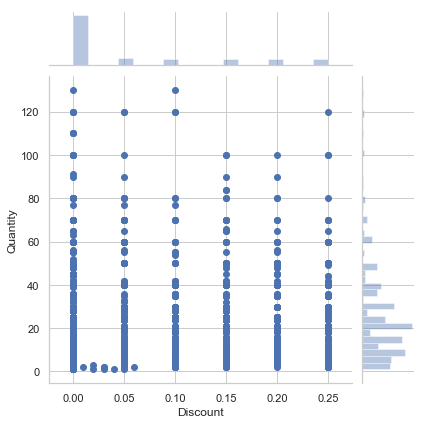

In [493]:
sns.jointplot(x='Discount',y = 'Quantity',data = orderdetail_table,kind = 'scatter')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


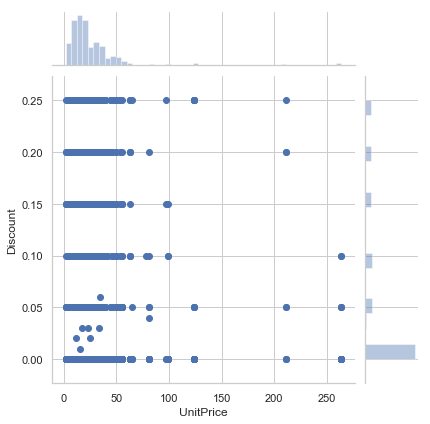

In [558]:
sns.jointplot(x='UnitPrice',y = 'Discount',data = orderdetail_table,kind = 'scatter')

In [559]:
price_0_50 = pd.read_sql_query("SELECT * FROM orderdetail WHERE UnitPrice BETWEEN 0 and 50", con)
print(len(price_0_50))
price_50_100 = pd.read_sql_query("SELECT * FROM orderdetail WHERE UnitPrice BETWEEN 50.01 and 100", con)
print(len(price_50_100))
price_100_150 = pd.read_sql_query("SELECT * FROM orderdetail WHERE UnitPrice BETWEEN 100.01 and 150", con)
print(len(price_100_150))
price_150_200 = pd.read_sql_query("SELECT * FROM orderdetail WHERE UnitPrice BETWEEN 150.01 and 200", con)
print(len(price_150_200))
price_200_250 = pd.read_sql_query("SELECT * FROM orderdetail WHERE UnitPrice BETWEEN 200.01 and 250", con)
print(len(price_200_250))
price_250_300 = pd.read_sql_query("SELECT * FROM orderdetail WHERE UnitPrice BETWEEN 250.01 and 300", con)
print(len(price_250_300))

1992
117
22
0
8
16


### H0: the mean discount of items ordered for the various level of prices are equal 
### HA: the mean discount of items ordered for the various level of prices do not equal (the level of discount affects the number of items ordered)

In [563]:
#check variance
print(stats.levene(price_0_50['Discount'], price_50_100['Discount'], price_100_150['Discount'], 
                    price_200_250['Discount'], price_250_300['Discount']))

LeveneResult(statistic=1.2572042994778685, pvalue=0.2847133860905552)


p value is greater than .05 so we can use an anova test

In [564]:
fstat, pval = stats.f_oneway(price_0_50['Discount'], price_50_100['Discount'], price_100_150['Discount'], 
                                price_200_250['Discount'], price_250_300['Discount'])

pval

0.2058050087140513

the p value is greater than .05 so we accept the null hypothesis, this shows that the level of discount does not change depending on unit price of an item. Maybe if the discount was greater for more expensive items there would be an increase in orders. 

### Category and discounts
### Category and number of orders 

In [494]:
category_table

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [495]:
product_table.head()


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [496]:
#Put each product category into it's own list
category_1 = pd.read_sql_query("SELECT * FROM product WHERE CategoryId = 1", con)
category_2 = pd.read_sql_query("SELECT * FROM product WHERE CategoryId = 2", con)
category_3 = pd.read_sql_query("SELECT * FROM product WHERE CategoryId = 3", con)
category_4 = pd.read_sql_query("SELECT * FROM product WHERE CategoryId = 4", con)
category_5 = pd.read_sql_query("SELECT * FROM product WHERE CategoryId = 5", con)
category_6 = pd.read_sql_query("SELECT * FROM product WHERE CategoryId = 6", con)
category_7 = pd.read_sql_query("SELECT * FROM product WHERE CategoryId = 7", con)
category_8 = pd.read_sql_query("SELECT * FROM product WHERE CategoryId = 8", con)

In [497]:
category_1

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.50,20,0,0,1
3,34,Sasquatch Ale,16,1,24 - 12 oz bottles,14.00,111,0,15,0
4,35,Steeleye Stout,16,1,24 - 12 oz bottles,18.00,20,0,15,0
5,38,Côte de Blaye,18,1,12 - 75 cl bottles,263.50,17,0,15,0
6,39,Chartreuse verte,18,1,750 cc per bottle,18.00,69,0,5,0
7,43,Ipoh Coffee,20,1,16 - 500 g tins,46.00,17,10,25,0
8,67,Laughing Lumberjack Lager,16,1,24 - 12 oz bottles,14.00,52,0,10,0
9,70,Outback Lager,7,1,24 - 355 ml bottles,15.00,15,10,30,0


In [498]:
#print(sum(category_1['UnitsOnOrder']))
print(sum(category_2['UnitsOnOrder']))
print(sum(category_3['UnitsOnOrder']))
print(sum(category_4['UnitsOnOrder']))
print(sum(category_5['UnitsOnOrder']))
print(sum(category_6['UnitsOnOrder']))
print(sum(category_7['UnitsOnOrder']))
print(sum(category_8['UnitsOnOrder']))

print(np.mean(category_2['UnitsOnOrder']))
print(np.mean(category_3['UnitsOnOrder']))
print(np.mean(category_4['UnitsOnOrder']))
print(np.mean(category_5['UnitsOnOrder']))
print(np.mean(category_6['UnitsOnOrder']))
print(np.mean(category_7['UnitsOnOrder']))
print(np.mean(category_8['UnitsOnOrder']))

170
180
140
90
0
20
120
14.166666666666666
13.846153846153847
14.0
12.857142857142858
0.0
4.0
10.0


In [499]:
print(stats.levene(category_2['UnitsOnOrder'], category_3['UnitsOnOrder'], 
                   category_4['UnitsOnOrder'], category_5['UnitsOnOrder'],
                  category_6['UnitsOnOrder'], category_7['UnitsOnOrder'],
                  category_8['UnitsOnOrder']))

LeveneResult(statistic=0.3408650005705809, pvalue=0.912358678609936)


In [500]:
fstat, pval = stats.f_oneway(category_2['UnitsOnOrder'], category_3['UnitsOnOrder'], 
                   category_4['UnitsOnOrder'], category_5['UnitsOnOrder'],
                  category_6['UnitsOnOrder'], category_7['UnitsOnOrder'],
                  category_8['UnitsOnOrder'])


pval

0.912358678609936

pvalue is above .05 this shows that the category of product is affects the quantity being ordered. This can be used by the company to discount certain items that may not typically be bought in bulk to encourage customers to buy more because we saw that discount carries significance with quantity

In [501]:
#frames = [product_table, category_table]
#combine = pd.concat(frames, sort=True)

combo = pd.merge(product_table, category_table)
combo



,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,Description
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0,Confections,"Desserts, candies, and sweet breads"
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0,Dairy Products,Cheeses
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0,Meat/Poultry,Prepared meats
6,7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30.00,15,0,10,0,Produce,Dried fruit and bean curd
7,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0,Seafood,Seaweed and fish


### Location and # orders

In [502]:
order_table.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [503]:
order_table['ShipCountry'].unique()

array(['France', 'Germany', 'Brazil', 'Belgium', 'Switzerland',
       'Venezuela', 'Austria', 'Mexico', 'USA', 'Sweden', 'Finland',
       'Italy', 'Spain', 'UK', 'Ireland', 'Portugal', 'Canada', 'Denmark',
       'Poland', 'Norway', 'Argentina'], dtype=object)

In [533]:
france_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'France'", con)
print(len(france_orders))
germany_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Germany'", con)
print(len(germany_orders))
brazil_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Brazil'", con)
print(len(brazil_orders))
belgium_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Belgium'", con)
print(len(belgium_orders))
switzerland_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Switzerland'", con)
print(len(switzerland_orders))
venezuela_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Venezuela'", con)
print(len(venezuela_orders))
austria_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Austria'", con)
print(len(austria_orders))
mexico_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Mexico'", con)
print(len(mexico_orders))
usa_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'USA'", con)
print(len(usa_orders))
sweden_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Sweden'", con)
print(len(sweden_orders))
finland_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Finland'", con)
print(len(finland_orders))
italy_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Italy'", con)
print(len(italy_orders))
spain_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Spain'", con)
print(len(spain_orders))
uk_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'UK'", con)
print(len(uk_orders))
ireland_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Ireland'", con)
print(len(ireland_orders))
portugal_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Portugal'", con)
print(len(portugal_orders))
canada_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Canada'", con)
print(len(canada_orders))
denmark_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Denmark'", con)
print(len(denmark_orders))
poland_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Poland'", con)
print(len(poland_orders))
norway_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Norway'", con)
print(len(norway_orders))
argentina_orders = pd.read_sql_query("SELECT Id FROM [order] WHERE ShipCountry = 'Argentina'", con)
print(len(argentina_orders))

77
122
83
19
18
46
40
28
122
37
22
28
23
56
19
13
30
18
7
6
16


In [536]:
employee_table['Country'].unique()

array(['USA', 'UK'], dtype=object)

In [541]:
employee_table.head()
usa_employees = pd.read_sql_query("SELECT LastName FROM employee WHERE Country = 'USA'", con)
print(len(usa_employees))
uk_employees = pd.read_sql_query("SELECT LastName FROM employee WHERE Country = 'UK'", con)
print(len(uk_employees))

5
4


In [551]:
order_table.shape

(830, 14)

In [553]:
order_table.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


### split by unit price and view discounts

In [554]:
orderdetail_table.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [556]:
stats.levene(discount_0['UnitPrice'], discounts['UnitPrice'])

LeveneResult(statistic=1.2286182081162179e-05, pvalue=0.9972036133917422)

In [557]:
tstat, pval = ttest_ind(discount_0['UnitPrice'], discounts['UnitPrice'], equal_var=True)
print(pval)

0.9269822610324326


In [ ]:
# viewing the unit price for discount items vs non discount items
# does the unity price affect if and how much an item is discounted
# should the discount higher coast items more

In [ ]:
# mean discount is equal for differnt unit prices
# mean discount is not equal for different unit prices